Step 1: Import Required Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load and Explore the Data

In [23]:
# Load the dataset
data = pd.read_csv('Dataset.csv')

# Display initial data information
print("Initial Data Info:")
print(data.info())




Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int6

In [24]:
print("\nFirst few rows:\n", data.head())




First few rows:
    index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23  

In [25]:
# Check for missing values
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64


Step 3: Data Cleaning

In [26]:
# Drop rows with missing 'Book Name'
data_cleaned = data.dropna(subset=['Book Name'])

# Fill missing 'Publishing Year' with 0 (placeholder for unknown)
data_cleaned['Publishing Year'] = data_cleaned['Publishing Year'].fillna(0)

# Fill missing 'language_code' with 'unknown'
data_cleaned['language_code'] = data_cleaned['language_code'].fillna('unknown')

# Remove duplicates based on 'Book Name' and 'Author'
data_cleaned = data_cleaned.drop_duplicates(subset=['Book Name', 'Author'], keep='first')

# Convert 'Publishing Year' to integer
data_cleaned['Publishing Year'] = data_cleaned['Publishing Year'].astype(int)




C:\Users\bhagy\AppData\Local\Temp\ipykernel_15792\1628989081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Publishing Year'] = data_cleaned['Publishing Year'].fillna(0)
C:\Users\bhagy\AppData\Local\Temp\ipykernel_15792\1628989081.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['language_code'] = data_cleaned['language_code'].fillna('unknown')


In [27]:
# Final check after cleaning
print("\nData after cleaning:")
print(data_cleaned.info())
print(data_cleaned.head())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1047 non-null   int64  
 1   Publishing Year      1047 non-null   int64  
 2   Book Name            1047 non-null   object 
 3   Author               1047 non-null   object 
 4   language_code        1047 non-null   object 
 5   Author_Rating        1047 non-null   object 
 6   Book_average_rating  1047 non-null   float64
 7   Book_ratings_count   1047 non-null   int64  
 8   genre                1047 non-null   object 
 9   gross sales          1047 non-null   float64
 10  publisher revenue    1047 non-null   float64
 11  sale price           1047 non-null   float64
 12  sales rank           1047 non-null   int64  
 13  Publisher            1047 non-null   object 
 14  units sold           1047 non-null   int64  
dtypes: float64(4), int64(

Step 4: Exploratory Data Analysis (EDA)

In [28]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", data_cleaned.describe())



Descriptive Statistics:
              index  Publishing Year  Book_average_rating  Book_ratings_count  \
count  1047.000000      1047.000000           1047.00000         1047.000000   
mean    533.494747      1971.115568              4.00255        94987.737345   
std     308.421094       186.735278              0.24679        31449.738538   
min       0.000000      -560.000000              2.97000        27308.000000   
25%     267.500000      1984.500000              3.85000        70414.000000   
50%     534.000000      2002.000000              4.01000        89410.000000   
75%     796.500000      2009.000000              4.17000       113946.000000   
max    1069.000000      2016.000000              4.77000       206792.000000   

        gross sales  publisher revenue   sale price   sales rank    units sold  
count   1047.000000        1047.000000  1047.000000  1047.000000   1047.000000  
mean    1847.212875         833.911381     4.841490   610.357211   9799.228271  
std     39

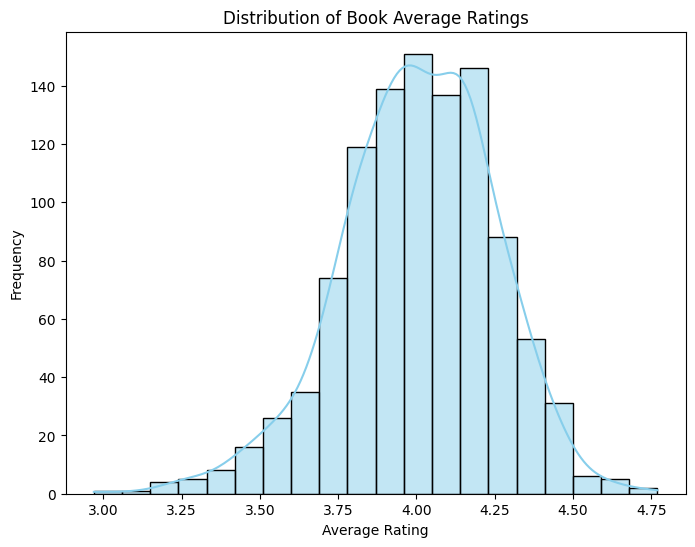

In [29]:
# Plot distribution of 'Book_average_rating'
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Book_average_rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Book Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()



C:\Users\bhagy\AppData\Local\Temp\ipykernel_15792\794895597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis")


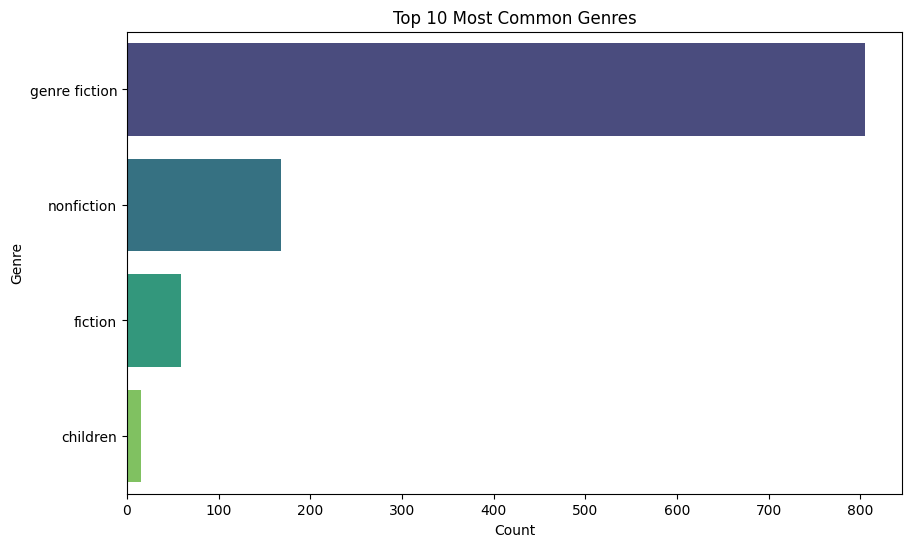

In [30]:
# Plot top 10 genres
plt.figure(figsize=(10, 6))
top_genres = data_cleaned['genre'].value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


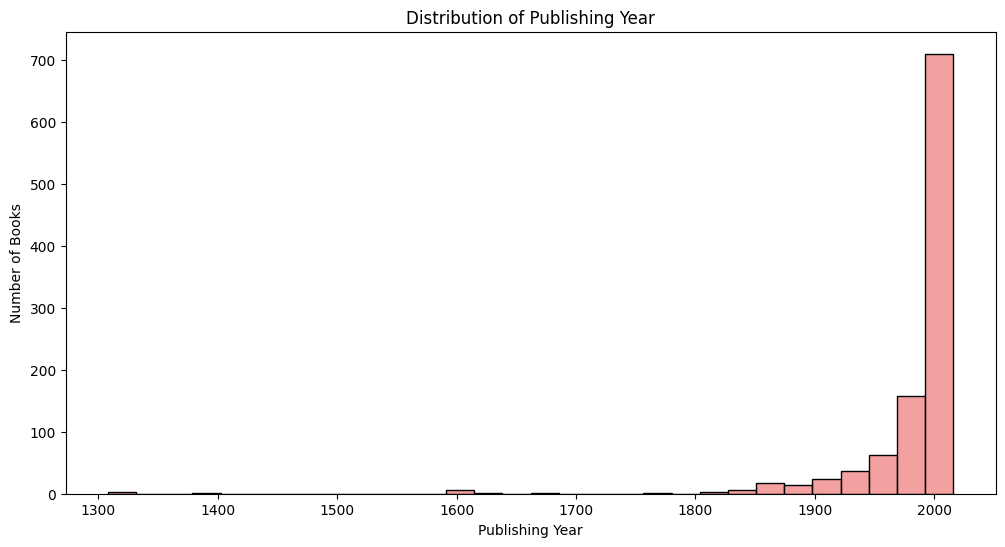

In [31]:
# Publishing Year distribution
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned[data_cleaned['Publishing Year'] > 0]['Publishing Year'], bins=30, color='lightcoral')
plt.title("Distribution of Publishing Year")
plt.xlabel("Publishing Year")
plt.ylabel("Number of Books")
plt.show()


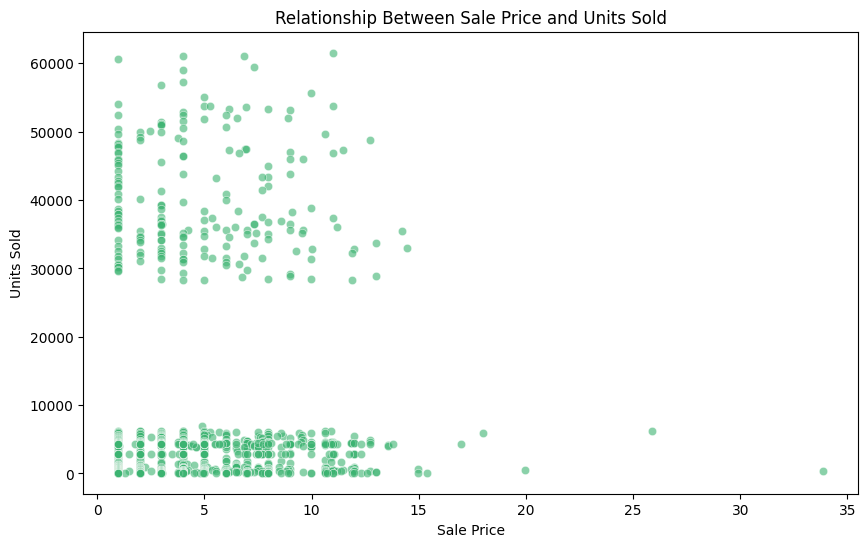

In [32]:
# Scatter plot to check correlation between sale price and units sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='sale price', y='units sold', alpha=0.6, color='mediumseagreen')
plt.title("Relationship Between Sale Price and Units Sold")
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.show()


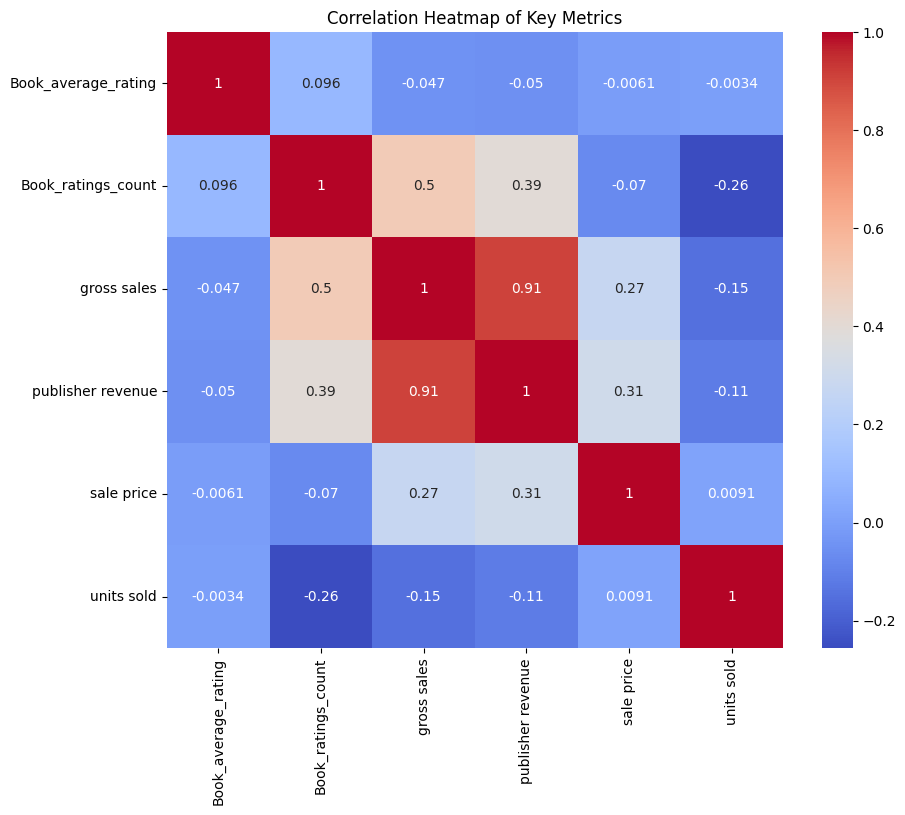

In [33]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
corr_matrix = data_cleaned[['Book_average_rating', 'Book_ratings_count', 'gross sales', 'publisher revenue', 'sale price', 'units sold']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Key Metrics")
plt.show()
